In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.layers import Dense,Input
from tensorflow.keras.models import Model

np.random.seed(123)
tf.random.set_seed(123)

In [2]:
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.preprocessing import StandardScaler

In [3]:
!curl -O  https://lazyprogrammer.me/course_files/sp500sub.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
  1 24.2M    1  302k    0     0   130k      0  0:03:11  0:00:02  0:03:09  130k
  6 24.2M    6 1694k    0     0   515k      0  0:00:48  0:00:03  0:00:45  515k
 18 24.2M   18 4590k    0     0  1075k      0  0:00:23  0:00:04  0:00:19 1076k
 34 24.2M   34 8494k    0     0  1613k      0  0:00:15  0:00:05  0:00:10 1718k
 50 24.2M   50 12.1M    0     0  1983k      0  0:00:12  0:00:06  0:00:06 2511k
 65 24.2M   65 15.8M    0     0  2235k      0  0:00:11  0:00:07  0:00:04 3223k
 79 24.2M   79 19.3M    0     0  2395k      0  0:00:10  0:00:08  0:00:02 3637k
 96 24.2M   96 23.4M    0     0  2590k      0  0:00

In [4]:
df0=pd.read_csv('sp500sub.csv',index_col='Date',parse_dates=True)

In [5]:
df=df0[df0['Name']=='SBUX'][['Close']].copy()

In [6]:
df['LogClose']=np.log(df['Close'])

In [7]:
df['DiffLogClose']=df['LogClose'].diff()

In [8]:
Ntest=21
train=df.iloc[:-Ntest]
test=df.iloc[-Ntest:]

In [9]:
scaler=StandardScaler()
train_scaled=scaler.fit_transform(train[['DiffLogClose']])
test_scaled=scaler.transform(test[['DiffLogClose']])

In [10]:
# boolean series to index df rows
train_idx=df.index <= train.index[-1]
test_idx=df.index > train.index[-1]

In [12]:
df.loc[train_idx,'ScaledLogReturn']=train_scaled.flatten()
df.loc[test_idx,'ScaledLogReturn']=test_scaled.flatten()

In [14]:
# Make supervised dataset
series = df['ScaledLogReturn'].dropna().to_numpy()

T=10
X=[]
Y=[]
for t in range(len(series)-T):
    x=series[t:t+T]
    X.append(x)
    y=series[t+T]
    Y.append(y)
    
X=np.array(X).reshape(-1,T)
Y=np.array(Y)
N=len(X)
print('X.shape',X.shape,'Y.shape',Y.shape)

X.shape (2252, 10) Y.shape (2252,)


In [16]:
Xtrain,Ytrain=X[:-Ntest],Y[:-Ntest]
Xtest,Ytest=X[-Ntest:],Y[-Ntest:]

In [18]:
# Basic ANN
i=Input(shape=(T,))
x=Dense(32,activation='relu')(i)
x=Dense(1)(x)
model=Model(i,x)

In [19]:
model.compile(
loss='mse',
optimizer='adam',)

In [20]:
r=model.fit(
Xtrain,
Ytrain,
epochs=200,
validation_data=(Xtest,Ytest)
)

Epoch 1/200
70/70 [==============================] - 2s 8ms/step - loss: 1.1730 - val_loss: 1.0347
Epoch 2/200
70/70 [==============================] - 0s 4ms/step - loss: 1.0623 - val_loss: 1.0413
Epoch 3/200
70/70 [==============================] - 0s 4ms/step - loss: 1.0317 - val_loss: 1.0475
Epoch 4/200
70/70 [==============================] - 0s 3ms/step - loss: 1.0147 - val_loss: 1.0369
Epoch 5/200
70/70 [==============================] - 0s 3ms/step - loss: 1.0050 - val_loss: 1.0367
Epoch 6/200
70/70 [==============================] - 0s 3ms/step - loss: 0.9946 - val_loss: 1.0260
Epoch 7/200
70/70 [==============================] - 0s 3ms/step - loss: 0.9876 - val_loss: 1.0200
Epoch 8/200
70/70 [==============================] - 0s 4ms/step - loss: 0.9800 - val_loss: 1.0024
Epoch 9/200
70/70 [==============================] - 0s 3ms/step - loss: 0.9754 - val_loss: 1.0191
Epoch 10/200
70/70 [==============================] - 0s 4ms/step - loss: 0.9710 - val_loss: 1.0137
Epoch 11/

70/70 [==============================] - 0s 3ms/step - loss: 0.8707 - val_loss: 1.0138
Epoch 84/200
70/70 [==============================] - 0s 3ms/step - loss: 0.8688 - val_loss: 1.0162
Epoch 85/200
70/70 [==============================] - 0s 3ms/step - loss: 0.8685 - val_loss: 1.0026
Epoch 86/200
70/70 [==============================] - 0s 3ms/step - loss: 0.8681 - val_loss: 1.0171
Epoch 87/200
70/70 [==============================] - 0s 3ms/step - loss: 0.8687 - val_loss: 1.0218
Epoch 88/200
70/70 [==============================] - 0s 3ms/step - loss: 0.8646 - val_loss: 1.0164
Epoch 89/200
70/70 [==============================] - 0s 3ms/step - loss: 0.8629 - val_loss: 1.0084
Epoch 90/200
70/70 [==============================] - 0s 3ms/step - loss: 0.8654 - val_loss: 1.0112
Epoch 91/200
70/70 [==============================] - 0s 3ms/step - loss: 0.8626 - val_loss: 1.0433
Epoch 92/200
70/70 [==============================] - 0s 3ms/step - loss: 0.8630 - val_loss: 1.0092
Epoch 93/200


70/70 [==============================] - 0s 4ms/step - loss: 0.8051 - val_loss: 1.0903
Epoch 165/200
70/70 [==============================] - 0s 3ms/step - loss: 0.8042 - val_loss: 1.0881
Epoch 166/200
70/70 [==============================] - 0s 3ms/step - loss: 0.8056 - val_loss: 1.0792
Epoch 167/200
70/70 [==============================] - 0s 3ms/step - loss: 0.8045 - val_loss: 1.0455
Epoch 168/200
70/70 [==============================] - 0s 3ms/step - loss: 0.8029 - val_loss: 1.0756
Epoch 169/200
70/70 [==============================] - 0s 3ms/step - loss: 0.8031 - val_loss: 1.0724
Epoch 170/200
70/70 [==============================] - 0s 3ms/step - loss: 0.8017 - val_loss: 1.0712
Epoch 171/200
70/70 [==============================] - 0s 3ms/step - loss: 0.8020 - val_loss: 1.0762
Epoch 172/200
70/70 [==============================] - 0s 3ms/step - loss: 0.8028 - val_loss: 1.0871
Epoch 173/200
70/70 [==============================] - 0s 3ms/step - loss: 0.8010 - val_loss: 1.0659
Epoc

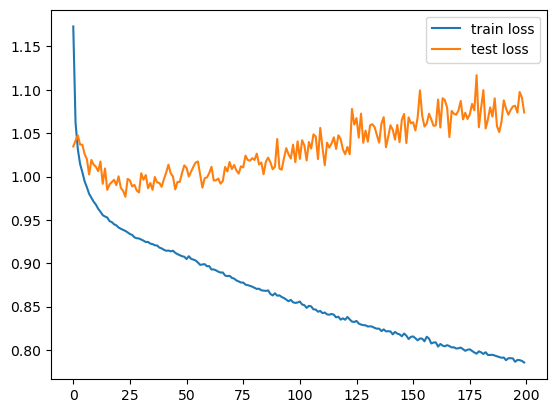

In [21]:
plt.plot(r.history['loss'],label='train loss')
plt.plot(r.history['val_loss'],label='test loss')
plt.legend();

In [22]:
# there is an overfitting
train_idx[:T+1]=False # first T+1 values are not predictable

In [24]:
Ptrain=model.predict(Xtrain)
Ptest=model.predict(Xtest)

Ptrain=scaler.inverse_transform(Ptrain).flatten()
Ptest=scaler.inverse_transform(Ptest).flatten()

1/1 [==============================] - 0s 47ms/step


In [25]:
# store diff predictions
df.loc[train_idx,'Diff ANN Train Prediction']=Ptrain
df.loc[test_idx,'Diff ANN Test Prediction']=Ptest

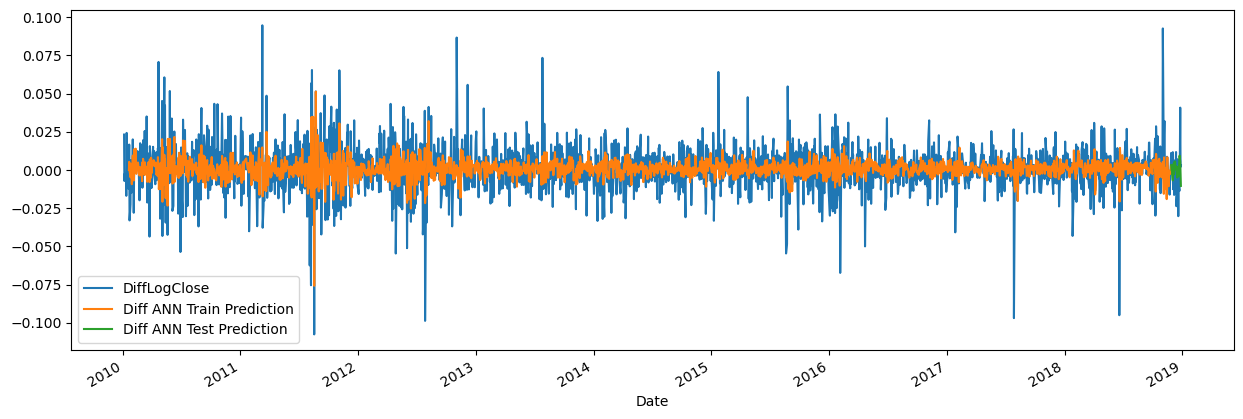

In [26]:
cols=['DiffLogClose',
     'Diff ANN Train Prediction',
     'Diff ANN Test Prediction']
df[cols].plot(figsize=(15,5));

In [27]:
# needed to compute un-differenced predictions
df['ShiftLogClose']=df['LogClose'].shift(1)
prev=df['ShiftLogClose']

In [28]:
# Last-known train value
last_train=train.iloc[-1]['LogClose']

In [29]:
# 1-step forecast
df.loc[train_idx,'1step_train']=prev[train_idx]+Ptrain
df.loc[test_idx,'1step_test']=prev[test_idx]+Ptest

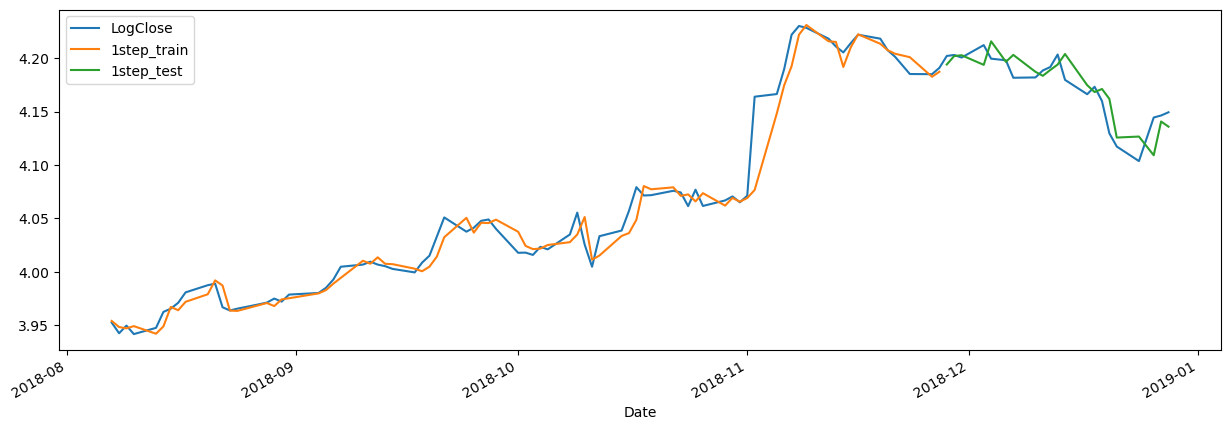

In [32]:
# plot 1-step forecast
df.iloc[-100:][['LogClose','1step_train','1step_test']].plot(figsize=(15,5));

In [33]:
# multi-step forecast
multistep_predictions=[]

# first test input
last_x=Xtest[0]

while len(multistep_predictions)<Ntest:
    p=model.predict(last_x.reshape(1,-1))[0]
    
    # update the predictions list
    multistep_predictions.append(p)

    # Make the new input
    last_x=np.roll(last_x,-1)
    last_x[-1]=p

1/1 [==============================] - 0s 39ms/step


In [34]:
# unscale
multistep_predictions=np.array(multistep_predictions)
multistep_predictions=scaler.inverse_transform(
multistep_predictions.reshape(-1,1)).flatten()

In [35]:
# save multi-step forecast to dataframe
df.loc[test_idx,'multistep']=last_train+np.cumsum(multistep_predictions)

<Axes: xlabel='Date'>

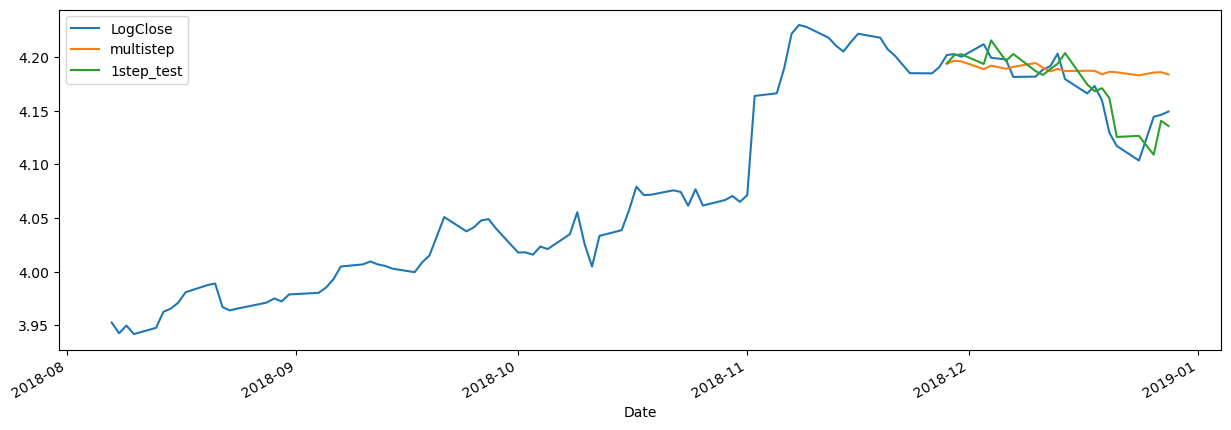

In [37]:
# plot 1-step and multi-step forecast
df.iloc[-100:][['LogClose','multistep','1step_test']].plot(figsize=(15,5))

In [38]:
# make multi-output supervised dataset
Tx=T
Ty=Ntest
X=[]
Y=[]
for t in range(len(series)-Tx-Ty+1):
    x=series[t:t+Tx]
    X.append(x)
    y=series[t+Tx:t+Tx+Ty]
    Y.append(y)
    
X=np.array(X).reshape(-1,Tx)
Y=np.array(Y).reshape(-1,Ty)
N=len(X)
print('X.shape',X.shape,'Y.shape',Y.shape)

X.shape (2232, 10) Y.shape (2232, 21)


In [39]:
Xtrain_m,Ytrain_m=X[:-1],Y[:-1]
Xtest_m,Ytest_m=X[-1:],Y[-1:]

In [40]:
# Basic ANN
i=Input(shape=(Tx,))
x=Dense(32,activation='relu')(i)
x=Dense(Ty)(x)
model=Model(i,x)

In [41]:
model.compile(
loss='mse',
optimizer='adam',
)

In [42]:
r=model.fit(
Xtrain_m,
Ytrain_m,
epochs=100,
validation_data=(Xtest_m,Ytest_m)
)

Epoch 1/100
70/70 [==============================] - 1s 8ms/step - loss: 1.1697 - val_loss: 0.8631
Epoch 2/100
70/70 [==============================] - 0s 4ms/step - loss: 1.0693 - val_loss: 0.9009
Epoch 3/100
70/70 [==============================] - 0s 3ms/step - loss: 1.0383 - val_loss: 0.9217
Epoch 4/100
70/70 [==============================] - 0s 4ms/step - loss: 1.0228 - val_loss: 0.9433
Epoch 5/100
70/70 [==============================] - 0s 3ms/step - loss: 1.0140 - val_loss: 0.9544
Epoch 6/100
70/70 [==============================] - 0s 4ms/step - loss: 1.0081 - val_loss: 0.9654
Epoch 7/100
70/70 [==============================] - 0s 4ms/step - loss: 1.0039 - val_loss: 0.9824
Epoch 8/100
70/70 [==============================] - 0s 4ms/step - loss: 1.0008 - val_loss: 0.9797
Epoch 9/100
70/70 [==============================] - 0s 4ms/step - loss: 0.9983 - val_loss: 0.9880
Epoch 10/100
70/70 [==============================] - 0s 4ms/step - loss: 0.9964 - val_loss: 0.9866
Epoch 11/

70/70 [==============================] - 0s 3ms/step - loss: 0.9711 - val_loss: 0.9880
Epoch 84/100
70/70 [==============================] - 0s 4ms/step - loss: 0.9712 - val_loss: 0.9957
Epoch 85/100
70/70 [==============================] - 0s 4ms/step - loss: 0.9710 - val_loss: 0.9884
Epoch 86/100
70/70 [==============================] - 0s 3ms/step - loss: 0.9708 - val_loss: 0.9899
Epoch 87/100
70/70 [==============================] - 0s 3ms/step - loss: 0.9706 - val_loss: 0.9910
Epoch 88/100
70/70 [==============================] - 0s 3ms/step - loss: 0.9705 - val_loss: 0.9903
Epoch 89/100
70/70 [==============================] - 0s 3ms/step - loss: 0.9704 - val_loss: 0.9890
Epoch 90/100
70/70 [==============================] - 0s 4ms/step - loss: 0.9703 - val_loss: 0.9913
Epoch 91/100
70/70 [==============================] - 0s 3ms/step - loss: 0.9702 - val_loss: 0.9942
Epoch 92/100
70/70 [==============================] - 0s 3ms/step - loss: 0.9700 - val_loss: 0.9896
Epoch 93/100


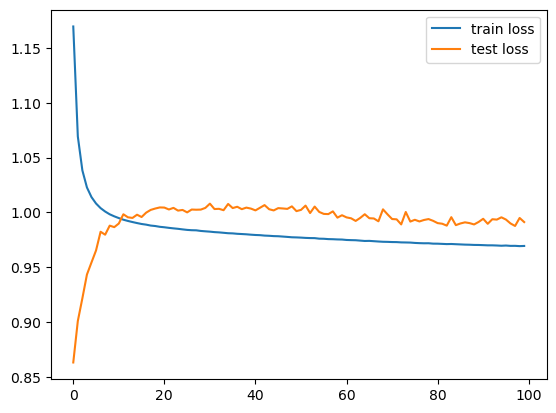

In [43]:
plt.plot(r.history['loss'],label='train loss')
plt.plot(r.history['val_loss'],label='test loss')
plt.legend();

In [44]:
Ptrain=model.predict(Xtrain_m)
Ptest=model.predict(Xtest_m)

1/1 [==============================] - 0s 32ms/step


In [45]:
Ptrain.shape,Ptest.shape

((2231, 21), (1, 21))

In [46]:
Ptrain=Ptrain[:,0]
Ptest=Ptest[0]

In [47]:
# unscale
Ptest=scaler.inverse_transform(Ptest.reshape(-1,1)).flatten()

In [48]:
# save multi-output forecast to dataframe
df.loc[test_idx,'multioutput']=last_train+np.cumsum(Ptest)

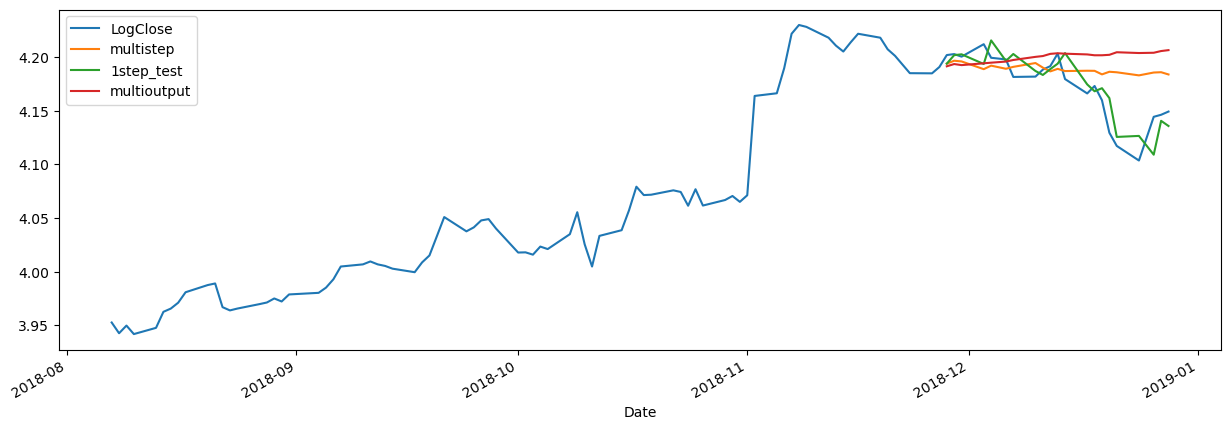

In [49]:
# plot all forecasts
cols=['LogClose','multistep','1step_test','multioutput']
df.iloc[-100:][cols].plot(figsize=(15,5));

In [50]:
# MAPE
test_log_pass = df.iloc[-Ntest:]['LogClose']
mape1=mean_absolute_percentage_error(
test_log_pass,df.loc[test_idx,'multistep'])
print('multi-step MAPE:',mape1)
mape2=mean_absolute_percentage_error(
test_log_pass,df.loc[test_idx,'multioutput'])
print('multi-output MAPE:',mape2)

multi-step MAPE: 0.005609304645761958
multi-output MAPE: 0.007788571466077287


## 1-Step Binary Classification

In [51]:
Ytrain_b=(Ytrain>0)*1
Ytest_b=(Ytest>0)*1

In [52]:
# Basic ANN
i=Input(shape=(T,))
x=Dense(32,activation='relu')(i)
x=Dense(1)(x)
model=Model(i,x)

In [55]:
model.compile(
loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
optimizer='adam',
metrics=['accuracy'],)

In [60]:
r=model.fit(
Xtrain,
Ytrain_b,
epochs=100,
validation_data=(Xtest,Ytest_b))

Epoch 1/100
70/70 [==============================] - 0s 4ms/step - loss: 0.6039 - accuracy: 0.6132 - val_loss: 0.7603 - val_accuracy: 0.5238
Epoch 2/100
70/70 [==============================] - 0s 4ms/step - loss: 0.6041 - accuracy: 0.6253 - val_loss: 0.7565 - val_accuracy: 0.5238
Epoch 3/100
70/70 [==============================] - 0s 4ms/step - loss: 0.6042 - accuracy: 0.6266 - val_loss: 0.7578 - val_accuracy: 0.5238
Epoch 4/100
70/70 [==============================] - 0s 5ms/step - loss: 0.6043 - accuracy: 0.6275 - val_loss: 0.7561 - val_accuracy: 0.5238
Epoch 5/100
70/70 [==============================] - 0s 4ms/step - loss: 0.6044 - accuracy: 0.6235 - val_loss: 0.7489 - val_accuracy: 0.5238
Epoch 6/100
70/70 [==============================] - 0s 4ms/step - loss: 0.6043 - accuracy: 0.6235 - val_loss: 0.7540 - val_accuracy: 0.5238
Epoch 7/100
70/70 [==============================] - 0s 4ms/step - loss: 0.6042 - accuracy: 0.6253 - val_loss: 0.7538 - val_accuracy: 0.5238
Epoch 8/100
7

Epoch 59/100
70/70 [==============================] - 0s 4ms/step - loss: 0.5967 - accuracy: 0.6342 - val_loss: 0.7560 - val_accuracy: 0.4762
Epoch 60/100
70/70 [==============================] - 0s 4ms/step - loss: 0.5963 - accuracy: 0.6387 - val_loss: 0.7485 - val_accuracy: 0.5238
Epoch 61/100
70/70 [==============================] - 0s 3ms/step - loss: 0.5961 - accuracy: 0.6311 - val_loss: 0.7543 - val_accuracy: 0.4762
Epoch 62/100
70/70 [==============================] - 0s 4ms/step - loss: 0.5968 - accuracy: 0.6302 - val_loss: 0.7632 - val_accuracy: 0.5238
Epoch 63/100
70/70 [==============================] - 0s 3ms/step - loss: 0.5956 - accuracy: 0.6325 - val_loss: 0.7379 - val_accuracy: 0.5238
Epoch 64/100
70/70 [==============================] - 0s 4ms/step - loss: 0.5959 - accuracy: 0.6342 - val_loss: 0.7524 - val_accuracy: 0.5238
Epoch 65/100
70/70 [==============================] - 0s 3ms/step - loss: 0.5942 - accuracy: 0.6333 - val_loss: 0.7505 - val_accuracy: 0.4762
Epoch 

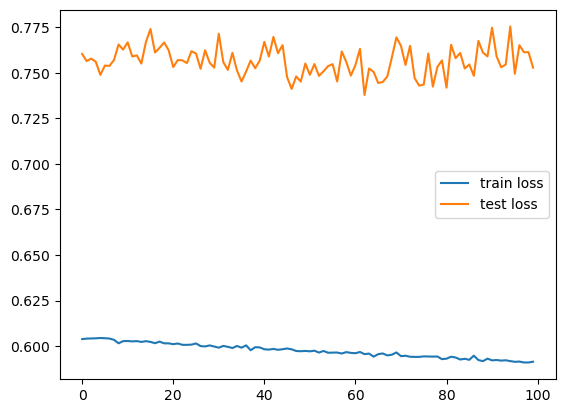

In [61]:
plt.plot(r.history['loss'],label='train loss')
plt.plot(r.history['val_loss'],label='test loss')
plt.legend();

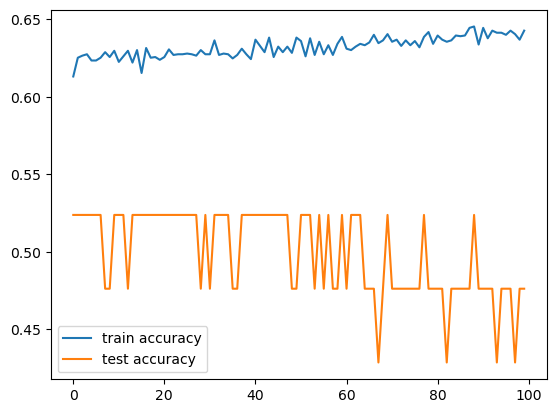

In [63]:
plt.plot(r.history['accuracy'],label='train accuracy')
plt.plot(r.history['val_accuracy'],label='test accuracy')
plt.legend();